# Multiple Linear Regression.

In [15]:
import pandas as pd

df_ml = pd.read_csv('salary_clean.csv')
df_s = df_ml[['Age','Gender','Education Level','Years of Experience','Salary']].copy()
df_s

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,male,Bachelor,5.0,90000.0
1,28.0,female,Master,3.0,65000.0
2,45.0,male,phd,15.0,150000.0
3,36.0,female,Bachelor,7.0,60000.0
4,52.0,male,Master,20.0,200000.0
...,...,...,...,...,...
1779,43.0,female,Master,15.0,150000.0
1780,27.0,male,high school,2.0,40000.0
1781,33.0,female,Bachelor,8.0,80000.0
1782,37.0,male,Bachelor,7.0,90000.0


# Convert categorical values into numerical values.

In [16]:
df_s['Gender'] = df_s['Gender'].astype('category')
df_s['Gender'] = df_s['Gender'].cat.codes

df_s['Education Level'] = df_s['Education Level'].astype('category')
df_s['Education Level'] = df_s['Education Level'].cat.codes

df_s

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,1,0,5.0,90000.0
1,28.0,0,1,3.0,65000.0
2,45.0,1,3,15.0,150000.0
3,36.0,0,0,7.0,60000.0
4,52.0,1,1,20.0,200000.0
...,...,...,...,...,...
1779,43.0,0,1,15.0,150000.0
1780,27.0,1,2,2.0,40000.0
1781,33.0,0,0,8.0,80000.0
1782,37.0,1,0,7.0,90000.0


In [18]:
# This dataset was cleaning before, but this step is necesary.
df_s.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Years of Experience    0
Salary                 0
dtype: int64

# Define x and y values.

In [19]:
X = df_s.drop(columns = 'Salary')
y = df_s['Salary']

# Split the dataset in training set and test set.

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Train the model on the training set.

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

# Predict the test set results.

In [40]:
y_pred = lr.predict(X_test)
y_pred

array([174242.09135451,  80672.12656984, 139059.19383165, 104724.27628636,
        93017.31699944, 174180.07169242, 183396.12607071, 131838.36968925,
        65026.3810675 , 203356.58769615,  80033.89542716, 137520.43031129,
        87563.45711228, 190839.97824512,  67050.47385487,  81795.68697953,
        63111.68763945,  92293.37634605, 178180.87756993,  96956.10321486,
       155343.17047667, 102723.87334761,  80672.12656984, 124708.42776043,
       163596.67281519, 139868.84399575,  64388.14992481,  63749.91878213,
        63597.01690647, 109853.81527643, 100170.94877689, 140292.15360068,
        89187.93014336,  77480.97085643, 195416.99560322, 116174.10704115,
        71627.49121297, 117817.09721798,  81310.35771252, 162473.11240549,
        93502.64626646, 148851.45969053, 210001.20035796, 133905.96499296,
       140330.48341415, 161572.58002781,  80033.89542716,  96870.39370415,
       124308.80800413,  79880.99355149, 173917.77045742, 101533.12057296,
        93502.64626646, 1

# Evaluate the model.

In [49]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2_score(y_test, y_pred)

0.7104800306442182

In [61]:
import numpy as np
mse = mean_squared_error(y_test, y_pred)
print(f'The mean squared erros: {mse}')

The mean squared erros: 795135993.8772767


In [62]:
# Root Mean Squared Error.
rmse = np.sqrt(mse)
print(f'The Root mean squared error {rmse}')

The Root mean squared error 28198.155859511036


In [63]:
# It is high.
mae= mean_absolute_error(y_test, y_pred)
print(f'The mean error is {mae}, for each salary prediction.')

The mean error is 21981.42699253408, for each salary prediction.


# Plot the results

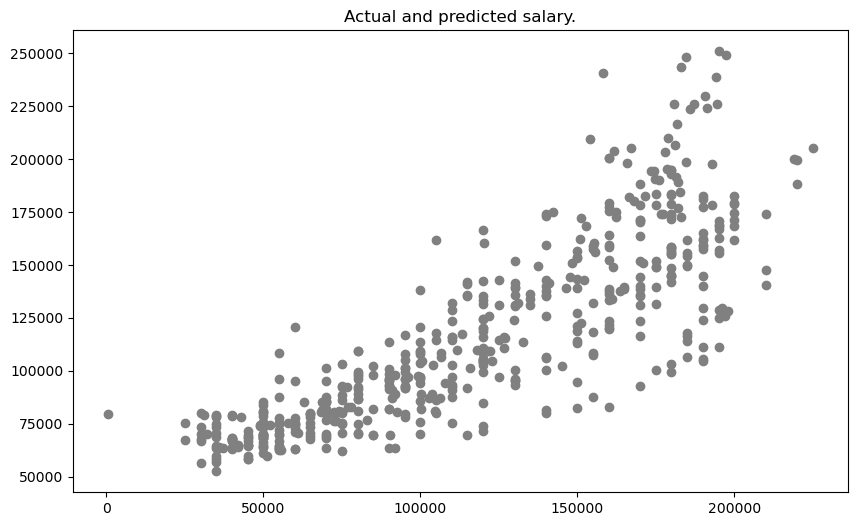

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.scatter(y_test, y_pred , color= 'grey')
plt.x_label='Actual Salary.'
plt.y_label='Predicted Salary'
plt.title('Actual and predicted salary.')
plt.show()

# Predict values.

In [44]:
predict_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test - y_pred})
predict_df[0:30]

,Actual Value,Predicted Value,Difference
1010,177347.0,174242.091355,3104.908645
942,70000.0,80672.126570,-10672.126570
1183,130000.0,139059.193832,-9059.193832
963,100679.0,104724.276286,-4045.276286
1422,95000.0,93017.316999,1982.683001
708,210000.0,174180.071692,35819.928308
161,175000.0,183396.126071,-8396.126071
141,110000.0,131838.369689,-21838.369689
933,50000.0,65026.381067,-15026.381067
906,177913.0,203356.587696,-25443.587696
